In [85]:
import pandas as pd       
from fbprophet import Prophet 

In [86]:
import plotly.offline as py           
import plotly.graph_objs as go        
import plotly.express as px           

In [87]:
import plotly.io as pio
pio.renderers.default = 'colab'     

## Task 1 :Data *Visualization*

In [88]:
from google.colab import files
uploaded = files.upload()

Saving bitcoin_data.csv to bitcoin_data (3).csv


In [89]:
df_bitcoin = pd.read_csv('bitcoin_data.csv')

In [90]:
df_bitcoin

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2201,2020-09-26,10702.237305,10778.500000,10682.082031,10754.437500,10754.437500,1.810501e+10
2202,2020-09-27,10752.939453,10804.732422,10643.458008,10774.426758,10774.426758,1.801688e+10
2203,2020-09-28,10771.641602,10949.123047,10716.676758,10721.327148,10721.327148,2.272037e+10
2204,2020-09-29,10712.462891,10858.939453,10665.344727,10848.830078,10848.830078,2.045987e+10


In [91]:
# Bitcoin specific Area graph
px.area(df_bitcoin, x="Date", y="Close")

In [92]:
px.line(df_bitcoin, x="Date", y="Volume")

In [93]:
# Bitcoin specific Violin plot
px.violin(df_bitcoin,  y="Volume")

In [94]:
# CandleStick Charts- Financial data visualization
fig = go.Figure(go.Candlestick(
                            x=df_bitcoin["Date"],
                            open=df_bitcoin['Open'],
                            high=df_bitcoin['High'],
                            low=df_bitcoin['Low'],
                            close=df_bitcoin['Close']
                            ))

fig.show()

## Task 2:  Data Prediction & Perfromance measure

In [95]:
def doCalculation(column2):
 print('\n\nPridiction starting for  : '+column2+ ' price')
 columns = ["Date", column2 ]
 df1 = pd.DataFrame(df_bitcoin, columns=columns)
 prophet_df = df1.rename(columns={"Date":'ds', column2:'y'})
 m = Prophet()


 import timeit
 #print('Run Time for fitting :')
 start = timeit.timeit()
 
 m.fit(prophet_df)

 end = timeit.timeit()
 
 #print(" running time for training :", start  -end )



 future = m.make_future_dataframe(periods=364)
 forecast = m.predict(future)
 #print(forecast.head(10))

 print('\n\nForecasted values : ')
 features = ['ds', 'trend']
 forecastN = forecast[features]
 print(forecastN)

 print("\nrunning time for training :", end - start) 
 print('\nForecasted values of coming days for : '+column2)
 fafaffa=forecast.tail(10)
 print(forecast[['ds', 'trend']].tail(10))

 figure = m.plot(forecast, xlabel='date', ylabel=column2)
 figure2 = m.plot_components(forecast)

 df=df_bitcoin
 metric_df = forecast.set_index('ds')
 #print("Predicated: "+ metric_df[['trend']])
 metric_df2 = df_bitcoin.set_index("Date")
 #print("Actual: "+metric_df2[[column2]])
 matrix_predictaedvalue_actualvalue=metric_df[['trend']].join(metric_df2[[column2]])

 #print(matrix_predictaedvalue_actualvalue)

 matrix_predictaedvalue_actualvalue.dropna(inplace=True)
 print('\n\nPredicated_value(trend) VS actual_value(close) : ')
 print(matrix_predictaedvalue_actualvalue)

 from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
 print("\n\naccuracy : ",r2_score(matrix_predictaedvalue_actualvalue['trend'], matrix_predictaedvalue_actualvalue[column2]))
 print("mean_squared_error : ",mean_squared_error(matrix_predictaedvalue_actualvalue['trend'], matrix_predictaedvalue_actualvalue[column2]))
 print("mean_absolute_error: ",mean_absolute_error(matrix_predictaedvalue_actualvalue['trend'], matrix_predictaedvalue_actualvalue[column2]))
 print('\n\n')

 filename='forecast_'+column2+'.csv'
 forecast.to_csv(filename)
 files.download(filename)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.




Pridiction starting for  : Close price


Forecasted values : 
             ds         trend
0    2014-09-17    468.142612
1    2014-09-18    467.585449
2    2014-09-19    467.028285
3    2014-09-20    466.471121
4    2014-09-21    465.913958
...         ...           ...
2565 2021-09-25  10032.398450
2566 2021-09-26  10034.032134
2567 2021-09-27  10035.665818
2568 2021-09-28  10037.299503
2569 2021-09-29  10038.933187

[2570 rows x 2 columns]

running time for training : 0.00026858900037041167

Forecasted values of coming days for : Close
             ds         trend
2560 2021-09-20  10024.230029
2561 2021-09-21  10025.863713
2562 2021-09-22  10027.497397
2563 2021-09-23  10029.131082
2564 2021-09-24  10030.764766
2565 2021-09-25  10032.398450
2566 2021-09-26  10034.032134
2567 2021-09-27  10035.665818
2568 2021-09-28  10037.299503
2569 2021-09-29  10038.933187


Predicated_value(trend) VS actual_value(close) : 
                  trend         Close
ds                               

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

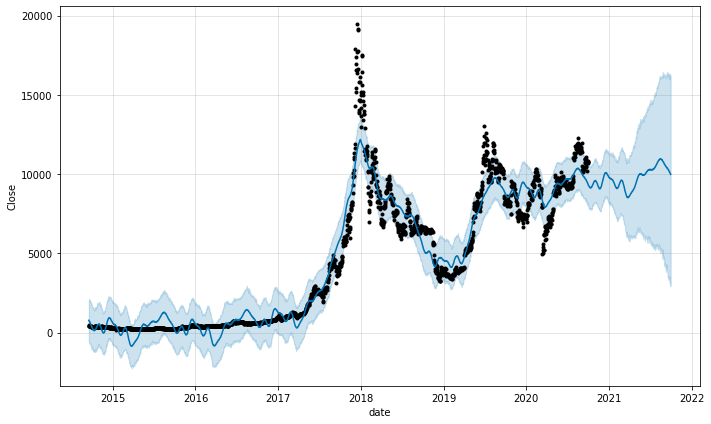

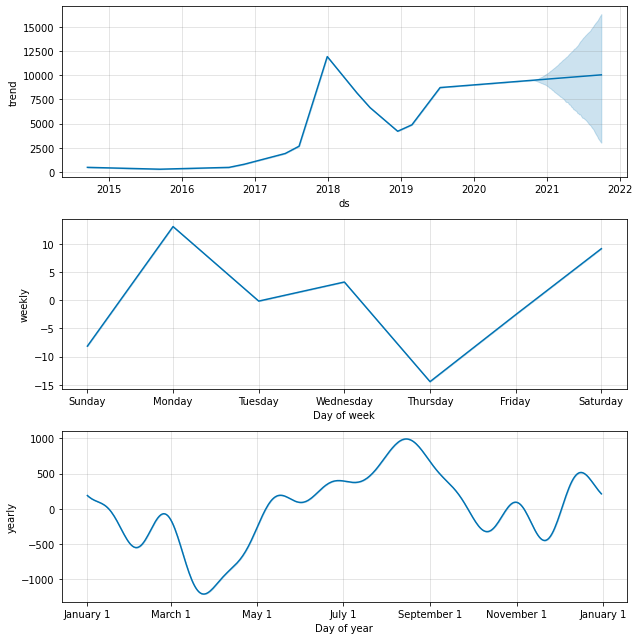

In [96]:
doCalculation('Close')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.




Pridiction starting for  : High price


Forecasted values : 
             ds         trend
0    2014-09-17    467.821324
1    2014-09-18    467.216745
2    2014-09-19    466.612166
3    2014-09-20    466.007587
4    2014-09-21    465.403008
...         ...           ...
2565 2021-09-25  10024.525945
2566 2021-09-26  10025.824782
2567 2021-09-27  10027.123619
2568 2021-09-28  10028.422455
2569 2021-09-29  10029.721292

[2570 rows x 2 columns]

running time for training : 0.0015282780000234197

Forecasted values of coming days for : High
             ds         trend
2560 2021-09-20  10018.031761
2561 2021-09-21  10019.330598
2562 2021-09-22  10020.629435
2563 2021-09-23  10021.928271
2564 2021-09-24  10023.227108
2565 2021-09-25  10024.525945
2566 2021-09-26  10025.824782
2567 2021-09-27  10027.123619
2568 2021-09-28  10028.422455
2569 2021-09-29  10029.721292


Predicated_value(trend) VS actual_value(close) : 
                  trend          High
ds                                  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

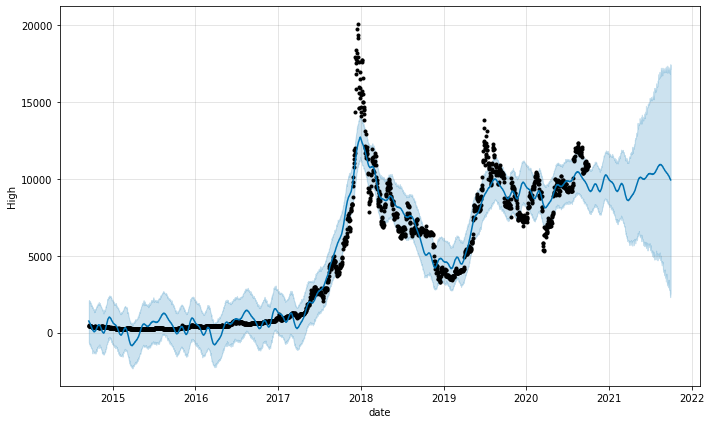

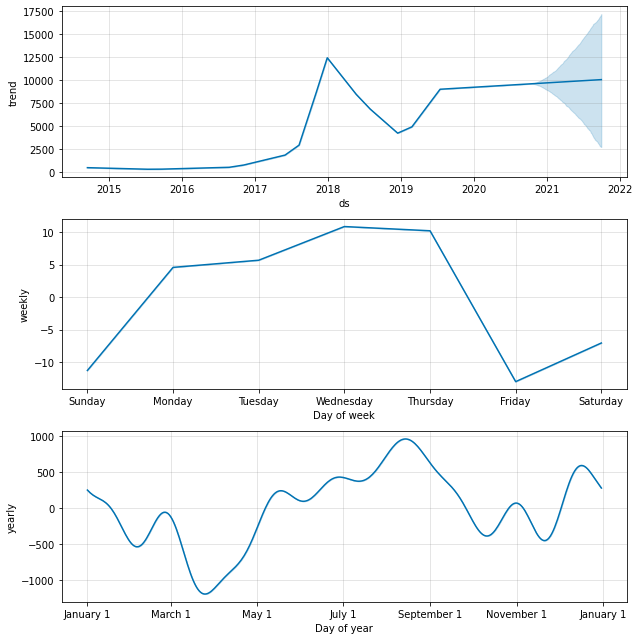

In [97]:
doCalculation('High')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.




Pridiction starting for  : Open price


Forecasted values : 
             ds        trend
0    2014-09-17   457.758721
1    2014-09-18   457.231337
2    2014-09-19   456.703953
3    2014-09-20   456.176569
4    2014-09-21   455.649185
...         ...          ...
2565 2021-09-25  9946.594365
2566 2021-09-26  9948.077945
2567 2021-09-27  9949.561526
2568 2021-09-28  9951.045106
2569 2021-09-29  9952.528687

[2570 rows x 2 columns]

running time for training : 0.003459757000200625

Forecasted values of coming days for : Open
             ds        trend
2560 2021-09-20  9939.176462
2561 2021-09-21  9940.660043
2562 2021-09-22  9942.143623
2563 2021-09-23  9943.627204
2564 2021-09-24  9945.110784
2565 2021-09-25  9946.594365
2566 2021-09-26  9948.077945
2567 2021-09-27  9949.561526
2568 2021-09-28  9951.045106
2569 2021-09-29  9952.528687


Predicated_value(trend) VS actual_value(close) : 
                  trend          Open
ds                                   
2014-09-17   457.75872

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

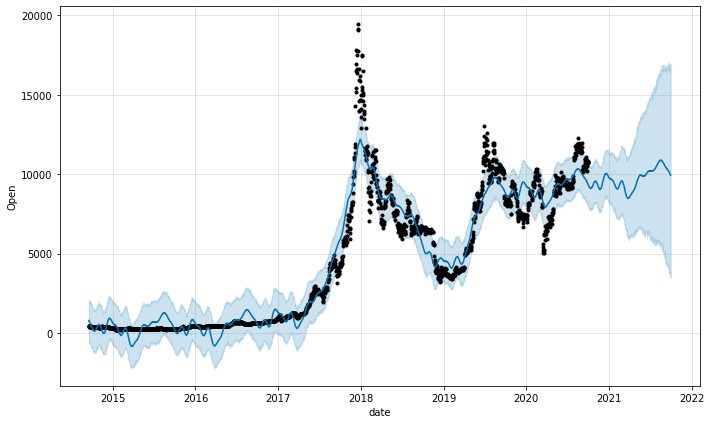

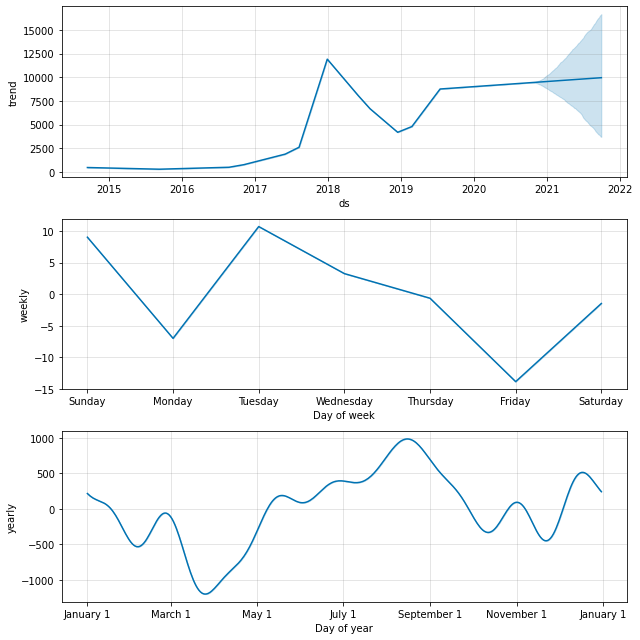

In [98]:
doCalculation('Open')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.




Pridiction starting for  : Low price


Forecasted values : 
             ds        trend
0    2014-09-17   451.017372
1    2014-09-18   450.447955
2    2014-09-19   449.878537
3    2014-09-20   449.309120
4    2014-09-21   448.739702
...         ...          ...
2565 2021-09-25  9935.385026
2566 2021-09-26  9937.172647
2567 2021-09-27  9938.960267
2568 2021-09-28  9940.747888
2569 2021-09-29  9942.535508

[2570 rows x 2 columns]

running time for training : 0.0021541319997595565

Forecasted values of coming days for : Low
             ds        trend
2560 2021-09-20  9926.446924
2561 2021-09-21  9928.234545
2562 2021-09-22  9930.022165
2563 2021-09-23  9931.809785
2564 2021-09-24  9933.597406
2565 2021-09-25  9935.385026
2566 2021-09-26  9937.172647
2567 2021-09-27  9938.960267
2568 2021-09-28  9940.747888
2569 2021-09-29  9942.535508


Predicated_value(trend) VS actual_value(close) : 
                  trend           Low
ds                                   
2014-09-17   451.017372

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

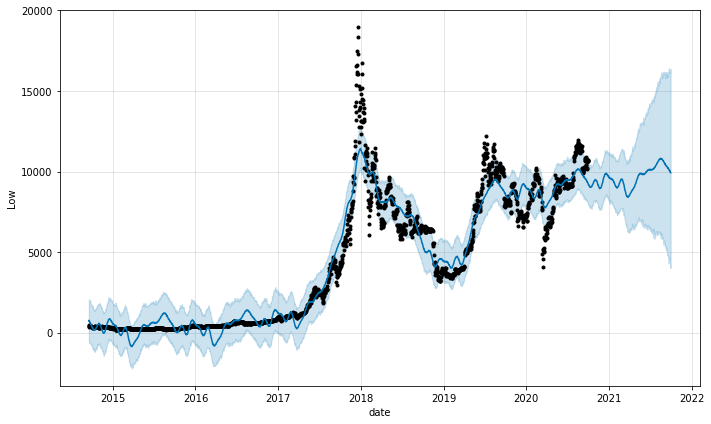

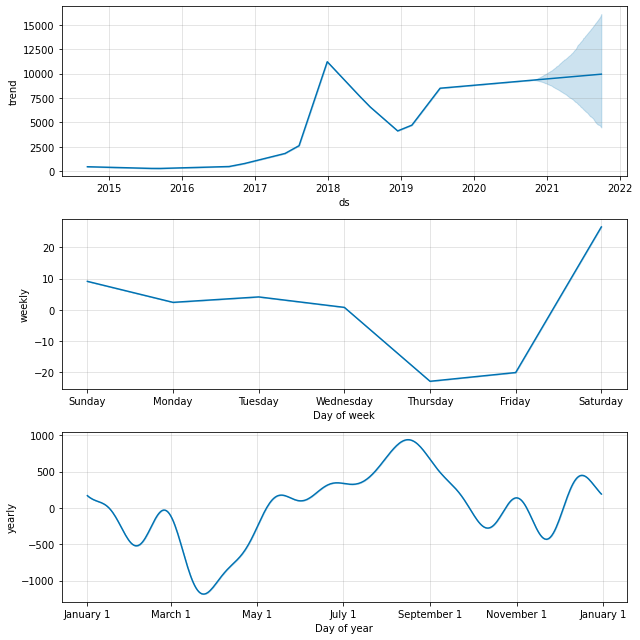

In [99]:
doCalculation('Low')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.




Pridiction starting for  : Adj Close price


Forecasted values : 
             ds         trend
0    2014-09-17    468.142612
1    2014-09-18    467.585449
2    2014-09-19    467.028285
3    2014-09-20    466.471121
4    2014-09-21    465.913958
...         ...           ...
2565 2021-09-25  10032.398450
2566 2021-09-26  10034.032134
2567 2021-09-27  10035.665818
2568 2021-09-28  10037.299503
2569 2021-09-29  10038.933187

[2570 rows x 2 columns]

running time for training : 0.0021432300000014948

Forecasted values of coming days for : Adj Close
             ds         trend
2560 2021-09-20  10024.230029
2561 2021-09-21  10025.863713
2562 2021-09-22  10027.497397
2563 2021-09-23  10029.131082
2564 2021-09-24  10030.764766
2565 2021-09-25  10032.398450
2566 2021-09-26  10034.032134
2567 2021-09-27  10035.665818
2568 2021-09-28  10037.299503
2569 2021-09-29  10038.933187


Predicated_value(trend) VS actual_value(close) : 
                  trend     Adj Close
ds                        

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

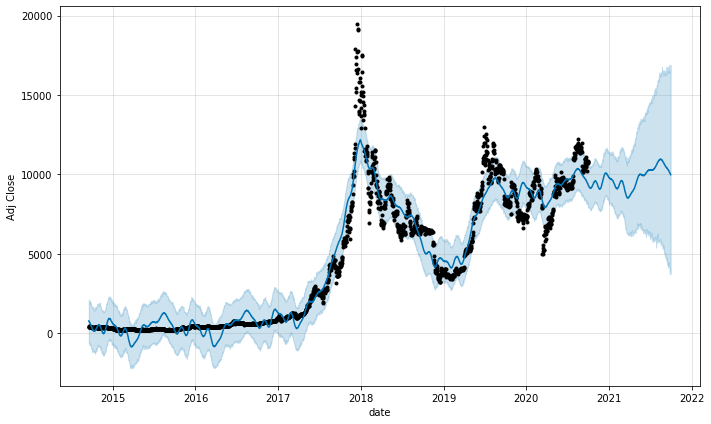

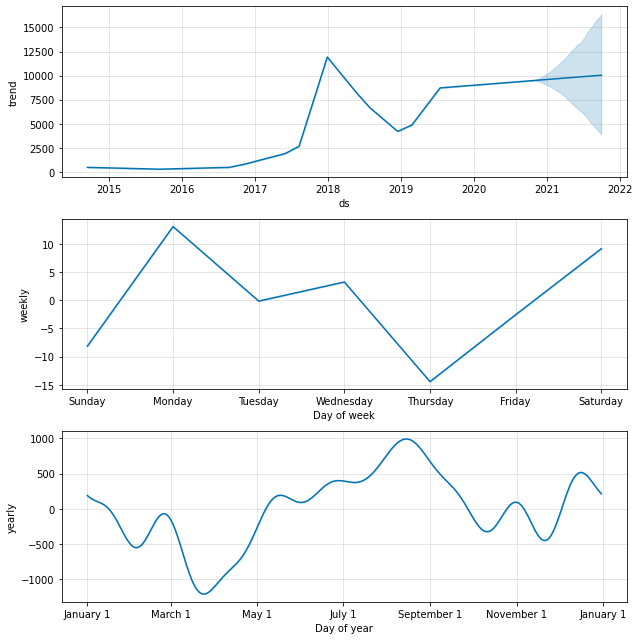

In [100]:
doCalculation('Adj Close')